In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


<AxesSubplot:xlabel='date'>

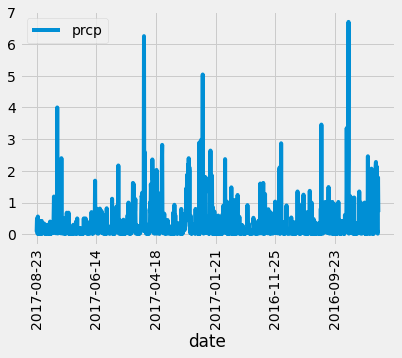

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#session.query(Measurement.date,Measurement.prcp).\
#filter(Measurement.date > '2016-08-22').\
#order_by(Measurement.date.desc()).all()

# Perform a query to retrieve the data and precipitation scores

dtp= session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date > '2016-08-22', Measurement.prcp).\
order_by(Measurement.date.desc()).all()
 
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
df = pd.DataFrame(dtp,columns=['date','prcp'])
df

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x='date',y='prcp',rot=90)


In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

    esa = session.query(Station).\
    filter(Station.id).count()
print(f"There are {esa} stations")

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
There are 9 stations


In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
act= session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(Measurement.station.desc()).all()
act

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs,func.max)).\
filter(Measurement.station=='USC00519281').all()

[(54.0)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()